#**Alzheimer's Computational Drug Discovery using Machine Learning**

Biological Activity Data of the compounds can be used to construct machine learning models called ***QSAR(Quantitative Structure Activity Relationship)***and this can hold great value for drug discovery efforts by allowing us to understand the origins of the biological activity and the interpretation o fthe model will allow us to understand how we can design a better drug which scratches the surface of novel drug discovery and even personalised medicine.



## **PART 1: DATA COLLECTION**

## **1. Installing Libraries**

In [ ]:
#Installing the chEMBL web resource library

!pip install chembl-webresource-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 60 kB 6.9 MB/s 
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


## **2. Importing Libraries**



In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

## **3. Searching for the Target Protein**

***Targets*** are the target proteins or organisms on which the drug works upon. Biologically these drugs interact with the protein or the organism and induce a modulatory activity towards it, either to activate or inhibit it.

In [ ]:
#Target Search for Coronavirus

target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,27.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,27.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
4,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
5,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
6,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
7,"[{'xref_id': 'P37136', 'xref_name': None, 'xre...",Rattus norvegicus,Acetylcholinesterase,15.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
8,"[{'xref_id': 'O42275', 'xref_name': None, 'xre...",Electrophorus electricus,Acetylcholinesterase,15.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
9,"[{'xref_id': 'P23795', 'xref_name': None, 'xre...",Bos taurus,Acetylcholinesterase,15.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913


### **Select and Retrieve Bioactivity Data for *Human Acetylcholinesterase*(1st entry)**

We assign the *Homo sapiens* Acetylcholinesterase to the **selected_target** variable

In [ ]:
selected_target= targets.target_chembl_id[0]
selected_target

'CHEMBL220'

Our goal is to retrive bioactivity data for CHEMBL220 that are reported as IC50 values in nM(nanomolar) unit

In [ ]:
activity= new_client.activity
res= activity.filter(target_chembl_id= selected_target).filter(standard_type='IC50')

df= pd.DataFrame.from_dict(res)
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8


In [ ]:
#Checking for the correct results in the standard type
df['standard_type'].unique()

array(['IC50'], dtype=object)

In [ ]:
df= df.astype({'standard_value': float})
df.dtypes

activity_comment              object
activity_id                    int64
activity_properties           object
assay_chembl_id               object
assay_description             object
assay_type                    object
assay_variant_accession       object
assay_variant_mutation        object
bao_endpoint                  object
bao_format                    object
bao_label                     object
canonical_smiles              object
data_validity_comment         object
data_validity_description     object
document_chembl_id            object
document_journal              object
document_year                float64
ligand_efficiency             object
molecule_chembl_id            object
molecule_pref_name            object
parent_molecule_chembl_id     object
pchembl_value                 object
potential_duplicate            int64
qudt_units                    object
record_id                      int64
relation                      object
src_id                         int64
s

In [ ]:
df['standard_value'].describe()

count    7.129000e+03
mean     1.204515e+13
std      8.439817e+14
min      0.000000e+00
25%      9.120000e+01
50%      1.300000e+03
75%      1.202264e+04
max      7.079458e+16
Name: standard_value, dtype: float64

A particular type of standard type helps in the uniformity of the data. Here we are taking the IC50 data.
Standard Value is the value of potency of the drug, the lower the standard value, the higher is the drug potency.
Ideally we want to find the drug whose IC50 is low that is it takes only a small amount to reach half of the inhibitory concentration

We will save the resulting bioactivity data into a csv file called **bioactivity_data.csv**

In [ ]:
df.to_csv('acetylcholinesterase_01_bioactivity_data_raw.csv', index=False)

Copying the csv to our drive

In [ ]:
! cp bioactivity_data.csv '/content/drive/MyDrive/Datasets'

cp: cannot stat 'bioactivity_data.csv': No such file or directory


In [ ]:
! ls -l '/content/drive/MyDrive/Datasets' #this shows that the data is sucessfully copied(-l command gives us the date and time of file created)

total 682
-rw------- 1 root root  12903 Sep 25 06:58 Admission_Predict.csv
-rw------- 1 root root 684858 Sep 23 07:12 Churn_Modelling.csv


In [ ]:
! head bioactivity_data.csv #looking at the data

head: cannot open 'bioactivity_data.csv' for reading: No such file or directory


##**4. Data Pre-processing**

###**4.1 Handling the missing data**

In [ ]:
df1 = df[df.standard_value.notna()]
df1 = df1[df.canonical_smiles.notna()]
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,None,23311838,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844259,Inhibition of human recombinant AChE using ace...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,0.63
8388,None,23311839,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844259,Inhibition of human recombinant AChE using ace...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,1.25
8389,None,23311840,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844259,Inhibition of human recombinant AChE using ace...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,3.6
8390,None,23311841,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844259,Inhibition of human recombinant AChE using ace...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,1.07


In [ ]:
len(df1.canonical_smiles.unique())

5824

In [ ]:
df1.standard_value.isna().count() #checking for missing data in the standard_value column and drop them

7127

In [ ]:
df1.standard_value.isna().sum()

0

In [ ]:
df1_nr = df1.drop_duplicates(['canonical_smiles'])
df1_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8384,None,23311835,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844259,Inhibition of human recombinant AChE using ace...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,2.57
8385,None,23311836,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844259,Inhibition of human recombinant AChE using ace...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,2.39
8386,None,23311837,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844259,Inhibition of human recombinant AChE using ace...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,0.41
8387,None,23311838,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844259,Inhibition of human recombinant AChE using ace...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,0.63


Combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df2 = df1_nr[selection]
df2

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00
...,...,...,...
8384,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,2.57
8385,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,2.39
8386,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,0.41
8387,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63


In [ ]:
df2= df2[df2.canonical_smiles.notna()]
df2.shape

(5824, 3)

In [ ]:
df2.to_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv', index=False)


**Labelling Compounds as either being active , inactive or intermediate**

The bioactivity data is in the IC50 unit. The compunds having the value less than 1000nm are considered to be active while those greater than 10,000nm will be considered as inactive. All the data in the in between is classsified under intermediate.

In [ ]:
df3 = pd.read_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [ ]:
bioactivity_class= []
for i in df3.standard_value:
  if float(i)>=10000:
    bioactivity_class.append('inactive')
  elif float(i)<= 1000:
    bioactivity_class.append('active')
  else:
    bioactivity_class.append('intermediate')


bioactivity_class

['active',
 'active',
 'inactive',
 'active',
 'active',
 'intermediate',
 'active',
 'inactive',
 'active',
 'inactive',
 'inactive',
 'active',
 'inactive',
 'active',
 'active',
 'active',
 'intermediate',
 'inactive',
 'intermediate',
 'inactive',
 'active',
 'inactive',
 'active',
 'inactive',
 'inactive',
 'active',
 'active',
 'active',
 'active',
 'inactive',
 'active',
 'inactive',
 'inactive',
 'inactive',
 'active',
 'inactive',
 'intermediate',
 'active',
 'inactive',
 'active',
 'intermediate',
 'inactive',
 'intermediate',
 'intermediate',
 'inactive',
 'inactive',
 'active',
 'active',
 'active',
 'inactive',
 'inactive',
 'inactive',
 'active',
 'active',
 'active',
 'inactive',
 'active',
 'intermediate',
 'inactive',
 'inactive',
 'active',
 'active',
 'inactive',
 'active',
 'intermediate',
 'inactive',
 'inactive',
 'inactive',
 'active',
 'inactive',
 'active',
 'active',
 'active',
 'inactive',
 'inactive',
 'inactive',
 'active',
 'active',
 'active',
 'inactive'

In [ ]:
#Making a dataframe with the selective data that we require

bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.00,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.00,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.00,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.00,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.00,active
...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,2.57,active
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,2.39,active
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,0.41,active
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,0.63,active


In [ ]:
df4.to_csv('acetylcholinesterase_03_bioactivity_data_curated.csv', index=False)

In [ ]:
! zip acetylcholinesterase.zip *.csv

  adding: acetylcholinesterase_01_bioactivity_data_raw.csv (deflated 91%)
  adding: acetylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 81%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)


In [ ]:
! ls -l '/content/drive/MyDrive/Datasets'

total 682
-rw------- 1 root root  12903 Sep 25 06:58 Admission_Predict.csv
-rw------- 1 root root 684858 Sep 23 07:12 Churn_Modelling.csv


## **PART 2:  EXPLORATORY DATA ANALYSIS**

## **1. Installing conda and rdkit**

This will allow to compute the molecular descriptors for the compound

In [ ]:
#Path and version numbers for python
!which python
!python --version

/usr/local/bin/python
Python 3.7.15


In [ ]:
%env PYTHONPATH= #creating environment in order to not clash with the default python

env: PYTHONPATH=#creating environment in order to not clash with the default python


In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
Unpacking payload ...
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1
    - charset-normalizer==2.0.4=pyhd3eb1b0_0
    - colorama==0.4.4=pyhd3eb1b0_0
    - conda-content-trust==0.1.1=pyhd3eb1b0_0
    - conda-package-handling==1.8.1=py37h7f8727e_0
    - conda==4.12.0=py37h06a4308_0
    - cryptography==36.0.0=py37h9ce1e76_0
    - idna==3.3=pyhd3eb1b0_0
    - ld_impl_linux-64==2.35.1=h7274673_9
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.3.0=h5101ec6_17
    - libgomp==9.3.0=h5101ec6_17
    - libstdcxx-ng==9.3.0=hd4cf53a_17
    - ncurses==6.3=h7f8727e_2
    - openssl==1.1.1n=h7f8727e_0
    - pip==21.2.2=py37h06a4308_0
    - pycosat==0.6.3=py37h27cfd23_0
    - pycparser==2.21=pyhd3

--2022-11-18 18:20:27--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh [following]
--2022-11-18 18:20:27--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 12.9M 8s
    50K .......... .......... ..........

In [ ]:
!which conda
!conda --version

/usr/local/bin/conda
conda 4.12.0


In [ ]:
#updating conda

%%bash
conda install --channel defaults conda python=3.7 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.10.11 |       h06a4308_0         124 KB
    certifi-2022.9.24          |   py37h06a4308_0         154 KB
    conda-22.9.0               |   py37h06a4308_0         878 KB
    openssl-1.1.1s             |       h7f8727e_0         3.6 MB
    toolz-0.12.0               |   py37h06a4308_0         104 KB
    ------------------------------------------------------------
                                           Total:         4.8 MB

The following NEW packages will be INSTALLED:

  toolz              pkgs/main/linux-64::toolz-0.12.0-py37h06a4308_0

The following packages will be UPDATED:

  ca-certificates                      2022.3.29-h06a4308_1 --> 2022.10.11-h06a4308_0
  c

In [ ]:
!conda --version

conda 22.9.0


In [ ]:
import sys
_ = (sys.path
        .append("/usr/local/lib/python3.7/site-packages"))

In [ ]:
! conda install -c rdkit rdkit -y

Solving environment: / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    bottleneck-1.3.5           |   py37h7deecbd_0         115 KB
    bzip2-1.0.8                |       h7b6447c_0          78 KB
    cairo-1.16.0               |       h19f5f5c_2         1.1 MB
    fontconfig-2.13.1          |       hef1e5e3_1         260 KB
    freetype-2.12.1            |       h4a9f257_0         626 KB
    giflib-5.2.1               |       h7b6447c_0          78 KB
    glib-2.69.1                |       h4ff587b_1         1.7 MB
    icu-58.2                   |       he6710b0_3        10.5 MB
    intel-openmp-2021.4.0      |    h06a4308_3561         4.2 MB
    jpeg-9e                    |       h

In [ ]:
# Loading the Bioactivity Data

# df= pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')


#as this is a continuation we can use our df4 for convenience
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active


In [ ]:
df_no_smiles = df4.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df4.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL133897,750.00,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.00,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.00,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.00,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
5819,CHEMBL4859103,2.57,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...
5820,CHEMBL4863615,2.39,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...
5821,CHEMBL4854913,0.41,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...
5822,CHEMBL4848527,0.63,active,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...


In [ ]:
df_clean_smiles= df_clean_smiles.dropna()
df_clean_smiles.shape

(5824, 4)

In [ ]:
df_clean_smiles.isna().sum()

molecule_chembl_id    0
standard_value        0
bioactivity_class     0
canonical_smiles      0
dtype: int64

## **2. Calculate Lipinski Descriptors**


Christopher Lipinski, a scientist at Pfizer came up with the **druglikeness** of compounds. It's based on Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as phramacokinetic profile. Lipinski analysed all the orally administered FDA approved drugs in the formulation named **Rule-of-5** or **Lipinski's Rule**.

According to the Lipinski's Rule-
1. Molecular weight < 500 Da
2. Octanol-water coefficient (log(P)) < 5
3. Hydrogen bond donors < 5
4. Hydrogen Bond Acceptors < 10
5. < 5 freely rotating bonds

In [ ]:
#importing libraries

import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
# Calculating descriptors

def  lipinski(smiles, verbose=False):

  moldata=[]
  for elem in smiles:
    mol = Chem.MolFromSmiles(elem)
    moldata.append(mol)
  
  baseData= np.arange(1,1)
  i=0
  for mol in moldata:

    desc_MolWt= Descriptors.MolWt(mol)
    desc_MolLogP= Descriptors.MolLogP(mol)
    desc_NumHDonors= Lipinski.NumHDonors(mol)
    desc_NumHAcceptors= Lipinski.NumHAcceptors(mol)

    row= np.array([
        desc_MolWt,
        desc_MolLogP,
        desc_NumHDonors,
        desc_NumHAcceptors
    ])

    if i==0:
      baseData= row

    else:
      baseData= np.vstack([baseData, row])
    i=i+1
  
  columnNames= ['MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors']
  descriptors= pd.DataFrame(data= baseData, columns= columnNames)

  return descriptors

    

In [ ]:
df_lipinski = lipinski(df_clean_smiles['canonical_smiles'])
df_lipinski

,MolWt,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
5819,562.154,7.8680,4.0,5.0
5820,506.094,7.3886,3.0,4.0
5821,523.121,5.9852,2.0,4.0
5822,547.143,7.0315,3.0,4.0


In [ ]:
# combining dataframes

df_combined= pd.concat([df4, df_lipinski], axis=1)
df_combined.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MolWt,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.0953,0.0,6.0


## **3. Convert IC50 to pIC50**


To allow the IC50 to be more uniformly distributed we convert IC50 to negative logarithmic scale which is esentially -log10(IC50)

This custom pIC50 will accept the dataframe as input and will:
* Take IC50 values from the `standard_value` column and convert it from nM to M by multiplying by $10^{-9}$
* Take the molar value and apply -log10
*Delete the `standard_value` column and create the `pIC50` column

In [ ]:
def pIC50(input):

  pIC50=[]
  for i in input['standard_value_norm']:
    molar= i *(10**(-9))
    pIC50.append(-np.log10(molar))
  
  input['pIC50']= pIC50
  x= input.drop('standard_value_norm', axis=1)

  return x


Note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise negative logarithmic value will become negative

In [ ]:
df_combined.standard_value.describe()

count    5.824000e+03
mean     2.588482e+12
std      1.068126e+14
min      0.000000e+00
25%      1.470000e+02
50%      2.400000e+03
75%      1.700000e+04
max      5.888437e+15
Name: standard_value, dtype: float64

In [ ]:
-np.log10((10**-9)*100000000) #we will cap so that the maximum valueso that it  doesn't go below 1 for easy computation

1.0

In [ ]:
-np.log10((10**-9)*10000000000)

-1.0

In [ ]:
def norm_val(input):

  norm=[]

  for i in input['standard_value']:
    if float(i)>100000000:
      i=100000000
    norm.append(i)
  
  input['standard_value_norm']= norm
  x= input.drop('standard_value', axis=1)

  return x


We will first apply the `norm_val` function to normalise the entire data and then use the `pIC50` function

In [ ]:
df_norm= norm_val(df_combined)
df_norm.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MolWt,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,800.0


In [ ]:
df_norm= df_norm.astype({'standard_value_norm': float})
df_norm.dtypes

molecule_chembl_id      object
canonical_smiles        object
bioactivity_class       object
MolWt                  float64
LogP                   float64
NumHDonors             float64
NumHAcceptors          float64
standard_value_norm    float64
dtype: object

In [ ]:
df_norm.standard_value_norm.describe()

count    5.824000e+03
mean     2.795865e+05
std      4.242714e+06
min      0.000000e+00
25%      1.470000e+02
50%      2.400000e+03
75%      1.700000e+04
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [ ]:
df_final= pIC50(df_norm)
df_final.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


,molecule_chembl_id,canonical_smiles,bioactivity_class,MolWt,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910


In [ ]:
df_final.pIC50.describe()

count    5824.000000
mean             inf
std              NaN
min         1.000000
25%         4.769551
50%         5.619789
75%         6.832683
max              inf
Name: pIC50, dtype: float64

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  5824 non-null   object 
 1   canonical_smiles    5824 non-null   object 
 2   bioactivity_class   5824 non-null   object 
 3   MolWt               5824 non-null   float64
 4   LogP                5824 non-null   float64
 5   NumHDonors          5824 non-null   float64
 6   NumHAcceptors       5824 non-null   float64
 7   pIC50               5824 non-null   float64
dtypes: float64(5), object(3)
memory usage: 364.1+ KB


In [ ]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv', index=False)

Now as we are concerned with the active and inactive classes of the bioactivity type, we will remove the intermediate data from the column

In [ ]:
df2_class= df_final[df_final['bioactivity_class']!= 'intermediate']
df2_class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MolWt,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,active,562.154,7.8680,4.0,5.0,8.590067
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,active,506.094,7.3886,3.0,4.0,8.621602
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,active,523.121,5.9852,2.0,4.0,9.387216
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,active,547.143,7.0315,3.0,4.0,9.200659


In [ ]:
df2_class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

## **4. Chemical Space Analysis(EDA) by Lipinski Descriptors**

In [ ]:
#Import libraries

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt


Text(0, 0.5, 'frequency')

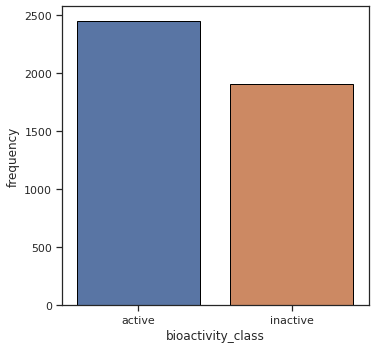

In [ ]:
#Frequency plot of the 2 activity classes

plt.figure(figsize=(5.5,5.5))

sns.countplot(x='bioactivity_class', data=df2_class, edgecolor='black')
plt.xlabel('bioactivity_class', )
plt.ylabel('frequency')

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


Text(0, 0.5, 'Molecular Weight')

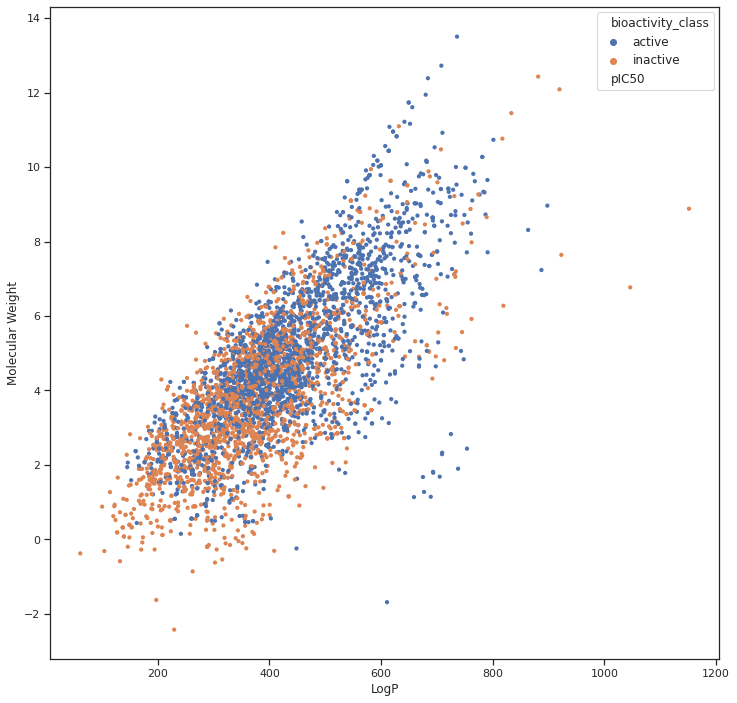

In [ ]:
from matplotlib.offsetbox import AnchoredOffsetbox
#making a scatter plot of molecular weight vs the log P(solubility)

plt.figure(figsize=(12,12))
sns.scatterplot(y=df2_class['LogP'], x= df2_class['MolWt'], hue= df2_class['bioactivity_class'] , size= df2_class['pIC50'], edgecolor='black')
plt.xlabel('LogP')
plt.ylabel('Molecular Weight')




Text(0, 0.5, 'pIC50')

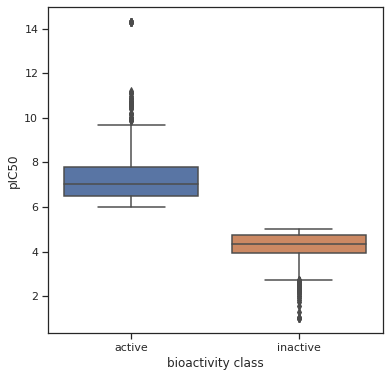

In [ ]:
#Box Plots for better understanding

plt.figure(figsize=(6,6))
sns.boxplot(x=df2_class['bioactivity_class'], y= df2_class['pIC50'])
plt.xlabel('bioactivity class')
plt.ylabel('pIC50')

**Statistical Ananlysis | Mann-Whitney U Test**

This test checks whether there's a difference btw two independent groups. In this case the difference between active and inactive classes.
Unlike the t-test where the mean difference is calculated, here the difference between the sum of ranks is calculated, this gives accurate results as there's no need for the data to be normally distributed.



In [ ]:
def mannwhitney(descriptor, verbose=False):

  from numpy.random import seed, randn
  from scipy.stats import mannwhitneyu

  seed(42)

  #actives and inactives
  selection= [descriptor, 'bioactivity_class']
  df= df2_class[selection]
  active= df[df['bioactivity_class']== 'active']
  active= active[descriptor]

  selection= [descriptor, 'bioactivity_class']
  df= df2_class[selection]
  inactive= df[df['bioactivity_class']== 'inactive']
  inactive= inactive[descriptor]

  #compare samples
  stat, p= mannwhitneyu(active, inactive)
  
  #interpret 
  alpha= 0.05
  if p> alpha:
    interpretation = 'Same distribution(fail to reject H0)'
  else:
    interpretation= 'Different distribution (reject H0)'

  results= pd.DataFrame({'Descriptor': descriptor,
                         'Statistics': stat,
                         'p':p,
                         'alpha': alpha,
                         'Interpretation': interpretation }, index=[0])
  
  filename= 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

  


  

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,4691505.0,0.0,0.05,Different distribution (reject H0)


Text(0, 0.5, 'MW')

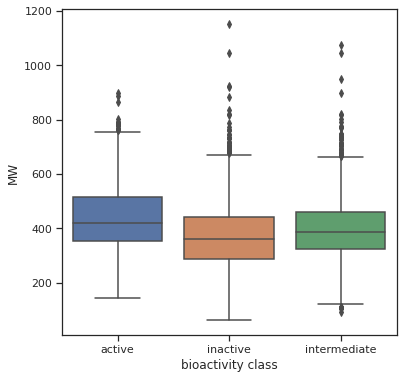

In [ ]:
#Plots

#MW

plt.figure(figsize=(6,6))
sns.boxplot(x=df_final['bioactivity_class'], y= df_final['MolWt'])
plt.xlabel('bioactivity class')
plt.ylabel('MW')

In [ ]:
mannwhitney('MolWt')

,Descriptor,Statistics,p,alpha,Interpretation
0,MolWt,3058287.5,1.232200e-66,0.05,Different distribution (reject H0)


Text(0, 0.5, 'LogP')

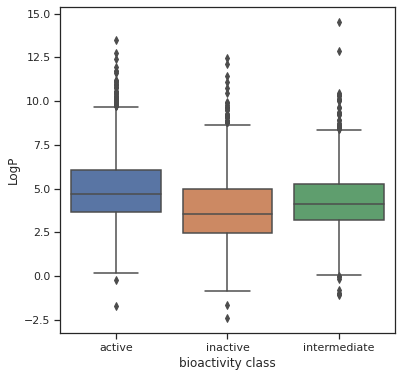

In [ ]:
#Log P

plt.figure(figsize=(6,6))
sns.boxplot(x=df_final['bioactivity_class'], y= df_final['LogP'])
plt.xlabel('bioactivity class')
plt.ylabel('LogP')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3140805.5,1.663478e-82,0.05,Different distribution (reject H0)


Text(0, 0.5, 'NumHDonors')

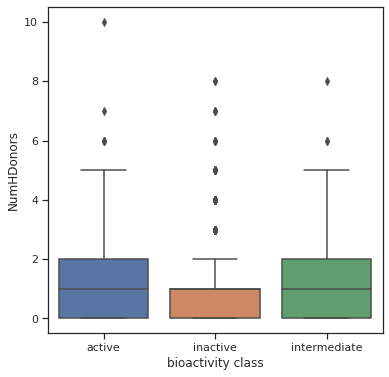

In [ ]:
#Num H Donors


plt.figure(figsize=(6,6))
sns.boxplot(x=df_final['bioactivity_class'], y= df_final['NumHDonors'])
plt.xlabel('bioactivity class')
plt.ylabel('NumHDonors')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2688100.5,3.809342e-18,0.05,Different distribution (reject H0)


Text(0, 0.5, 'NumHAcceptors')

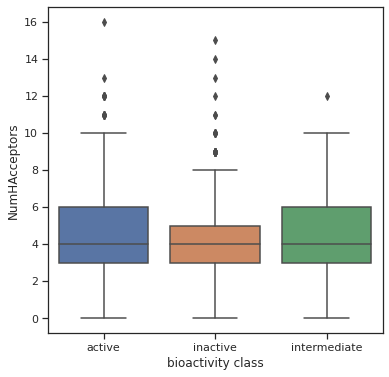

In [ ]:
#Num H Acceptors


plt.figure(figsize=(6,6))
sns.boxplot(x=df_final['bioactivity_class'], y= df_final['NumHAcceptors'])
plt.xlabel('bioactivity class')
plt.ylabel('NumHAcceptors')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2566325.5,5.985682e-08,0.05,Different distribution (reject H0)


***Interpretation of the Statistical Analyis***

**Box Plots**

**pIC50 values**

Taking a look at pIC50 values, the ***active*** and ***inactives*** displayed statistically significant difference, which is expected since threshold values (IC50 <1000 nM = Actives whicle IC50> 10,000 nM = Inactives, corresponding to pIC50 > 6 =Actives and <5 =Inactives) were used to define actives and inactives.

**Lipinki's descriptors**

All the descriptors(MW, LopP, NumHDonors, NumHAcceptors) exhibit **statistical difference** between the actives and the inactives

## **PART 3: DESCRIPTOR CALCULATION**

## **1. Download the PaDEL-Descriptor**

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-11-18 18:31:36--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-11-18 18:31:36--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2022-11-18 18:31:38 (180 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-11-18 18:31:38--  https://github

## **2. Loading the biocativity data**

We will use the pIC50 csv which will be used to form the regression model

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
import pandas as pd

In [ ]:
dataf= pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')
dataf

,molecule_chembl_id,canonical_smiles,bioactivity_class,MolWt,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
5819,CHEMBL4859103,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCNC(=O)c4cc(...,active,562.154,7.8680,4.0,5.0,8.590067
5820,CHEMBL4863615,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)Nc4cn[n...,active,506.094,7.3886,3.0,4.0,8.621602
5821,CHEMBL4854913,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...,active,523.121,5.9852,2.0,4.0,9.387216
5822,CHEMBL4848527,CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)NCc4cc[...,active,547.143,7.0315,3.0,4.0,9.200659


In [ ]:
dataf.isna().sum()

molecule_chembl_id    0
canonical_smiles      0
bioactivity_class     0
MolWt                 0
LogP                  0
NumHDonors            0
NumHAcceptors         0
pIC50                 0
dtype: int64

In [ ]:
selection=['canonical_smiles', 'molecule_chembl_id']

data_selection= dataf[selection]
data_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478


In [ ]:
! cat molecule.smi | wc -l

5824


These smiles notation contains the notations that pertains to the chemical structure, 'c', 'o', 'n' representing carbon, oxygen and nitrogen respectively

##**3. Calculating fingerprint descriptors**




### **3.1 Calculating PaDEL descriptors**

In [ ]:
! cat padel.sh #this shows all the cleaning that will be done to the data

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Streaming output truncated to the last 5000 lines.
Processing CHEMBL359288 in molecule.smi (826/5824). Average speed: 0.20 s/mol.
Processing CHEMBL539571 in molecule.smi (828/5824). Average speed: 0.20 s/mol.
Processing CHEMBL357953 in molecule.smi (827/5824). Average speed: 0.20 s/mol.
Processing CHEMBL450931 in molecule.smi (829/5824). Average speed: 0.20 s/mol.
Processing CHEMBL358026 in molecule.smi (830/5824). Average speed: 0.20 s/mol.
Processing CHEMBL2093017 in molecule.smi (831/5824). Average speed: 0.20 s/mol.
Processing CHEMBL148879 in molecule.smi (832/5824). Average speed: 0.20 s/mol.
Processing CHEMBL151194 in molecule.smi (833/5824). Average speed: 0.20 s/mol.
Processing CHEMBL543216 in molecule.smi (834/5824). Average speed: 0.20 s/mol.
Processing CHEMBL151388 in molecule.smi (835/5824). Average speed: 0.20 s/mol.
Processing CHEMBL554056 in molecule.smi (836/5824). Average speed: 0.20 s/mol.
Processing CHEMBL544165 in molecule.smi (837/5824). Average speed: 0.20 s/mol.


In [ ]:
! ls -l

total 145428
-rw-r--r-- 1 root root   4457982 Nov 18 18:20 acetylcholinesterase_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root    427529 Nov 18 18:20 acetylcholinesterase_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root    480885 Nov 18 18:20 acetylcholinesterase_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root    786540 Nov 18 18:22 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root    603944 Nov 18 18:22 acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root    580572 Nov 18 18:20 acetylcholinesterase.zip
-rw-r--r-- 1 root root  10364005 Nov 18 18:59 descriptors_output.csv
drwx------ 5 root root      4096 Nov 18 18:12 drive
drwxr-xr-x 3 root root      4096 Nov 18 18:31 __MACOSX
-rw-r--r-- 1 root root       126 Nov 18 18:31 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root       127 Nov 18 18:31 mannwhitneyu_MolWt.csv
-rw-r--r-- 1 root root       134 Nov 18 18:31 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root ro

###**3.2 Preparing X and y data matrices**

In [ ]:
dataf_X= pd.read_csv('descriptors_output.csv')
dataf_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,CHEMBL4859103,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5820,CHEMBL4863615,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5821,CHEMBL4854913,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5822,CHEMBL4848527,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#dropping the names as we only need the molecular features

dataf_X= dataf_X.drop(columns=['Name'])
dataf_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5820,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5821,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5822,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataf_y= dataf['pIC50']
dataf_y= pd.DataFrame(dataf_y)
dataf_y= pd.DataFrame(np.round(dataf_y['pIC50'], 2))
dataf_y


,pIC50
0,6.12
1,7.00
2,4.30
3,6.52
4,6.10
...,...
5819,8.59
5820,8.62
5821,9.39
5822,9.20


In [ ]:
#combining X and y

dataset= pd.concat([dataf_X, dataf_y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.12
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.00
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.52
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.59
5820,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.62
5821,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.39
5822,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.20


In [ ]:
dataset.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [ ]:
! zip acetylcholinesterase.zip *.csv

updating: acetylcholinesterase_01_bioactivity_data_raw.csv (deflated 91%)
updating: acetylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 81%)
updating: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)
  adding: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 77%)
  adding: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 76%)
  adding: acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv (deflated 96%)
  adding: descriptors_output.csv (deflated 96%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: mannwhitneyu_MolWt.csv (deflated 10%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_pIC50.csv (deflated 8%)


## **PART 4: MODEL BUILDING**

Lipinski descriptors provides with a set of simple molecular descriptors which gives us the overview of drug like property of the molecule. Lipinski created a set of 4 descriptors and rule of 5 whereby any drug which passes it will make a good oral drug. Pubchem fingerprints(used in this project) describe the local features of a molecule that is the unique building blocks of the molecule wheras the lipinski descriptor decribes the global features particularly the size, solubility and no' of H bonds donors/acceptors. If we consider a molecule as a lego building block, each molecule will be comprised of several such building blocks. The way in which these lego blocks are connected creates a unique property for the drug. This is the essence of drug discovery.
The goal is to rearrange these lego building blocks in a way that the molecule provides the most potency towards the target protein without being toxic and is safe.

##**1. Input Features**

In [ ]:
data= pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
data

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.12
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.00
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.52
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.59
5820,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.62
5821,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.39
5822,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.20


In [ ]:
final_data= data[data.iloc[:-1].notna()]
final_data.shape

(5824, 882)

In [ ]:
final_data= final_data.dropna()
final_data.shape

(5823, 882)

In [ ]:
final_data.dtypes

PubchemFP0      float64
PubchemFP1      float64
PubchemFP2      float64
PubchemFP3      float64
PubchemFP4      float64
                 ...   
PubchemFP877    float64
PubchemFP878    float64
PubchemFP879    float64
PubchemFP880    float64
pIC50           float64
Length: 882, dtype: object

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
final_data= clean_dataset(final_data)

In [ ]:
X= final_data.drop('pIC50', axis=1)
y= final_data['pIC50']

In [ ]:
X.shape, y.shape

((5822, 881), (5822,))

###**1.1 Removing the low variance features**

In [ ]:
#Removing the features that have the same value in all the samples

# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

X.shape

(5822, 143)

In [ ]:
X= X.astype(dtype='float64')
y=y.astype(dtype='float64')

In [ ]:
X.dtype, y.dtype

(dtype('float64'), dtype('float64'))

In [ ]:
np.where(np.isfinite(X)==False)

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
np.where(np.isinf(y)==True)

(array([], dtype=int64),)

###**1.2 Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

X_test.shape, y_test.shape, X_train.shape, y_train.shape

((1165, 143), (1165,), (4657, 143), (4657,))

In [ ]:
np.where(np.isnan(X_test)==True)

(array([], dtype=int64), array([], dtype=int64))

##**2. Regression Model**

In [ ]:
np.any(np.isnan(y_test))

False

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)
r2

0.5107698431824274

In [ ]:
y_pred = model.predict(X_test)

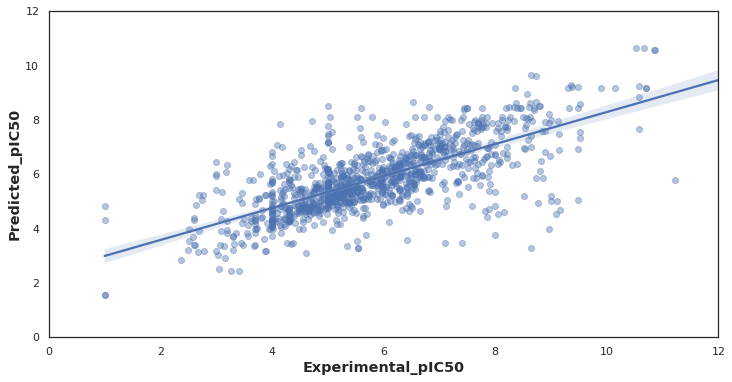

In [ ]:
#Plotting experimental vs predicted pIC50 values

import seaborn as sns

sns.set(color_codes=True)
sns.set_style('white')

ax= sns.regplot(x=y_test, y= y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental_pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted_pIC50', fontsize='large', fontweight='bold')

ax.set_xlim(0,12)
ax.set_ylim(0,12)
ax.figure.set_size_inches(12,6)
plt.show();

##**PART 5: MODEL COMPARISION**

In [ ]:
!pip install lazypredict

import lazypredict
from lazypredict.Supervised import LazyRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 29.1 MB/s eta 0:00:00


In [ ]:
#define and build models

clf= LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
train,test= clf.fit(X_train, X_test, y_train, y_test)

 95%|█████████▌| 40/42 [53:53<02:26, 73.41s/it] 

[19:53:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [53:57<00:00, 77.08s/it]


In [ ]:
#Performance table of training set
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.44,0.51,1.13,1.04
HistGradientBoostingRegressor,0.44,0.51,1.13,1.73
RandomForestRegressor,0.44,0.51,1.13,5.42
BaggingRegressor,0.42,0.49,1.16,0.67
MLPRegressor,0.37,0.45,1.20,9.64
KNeighborsRegressor,0.37,0.45,1.20,0.23
SVR,0.36,0.44,1.21,4.51
NuSVR,0.36,0.44,1.21,2.94
XGBRegressor,0.29,0.38,1.27,3.05


In [ ]:
#Performace table of test set
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.44,0.51,1.13,1.04
HistGradientBoostingRegressor,0.44,0.51,1.13,1.73
RandomForestRegressor,0.44,0.51,1.13,5.42
BaggingRegressor,0.42,0.49,1.16,0.67
MLPRegressor,0.37,0.45,1.20,9.64
KNeighborsRegressor,0.37,0.45,1.20,0.23
SVR,0.36,0.44,1.21,4.51
NuSVR,0.36,0.44,1.21,2.94
XGBRegressor,0.29,0.38,1.27,3.05


##**Visualisation of model performance**

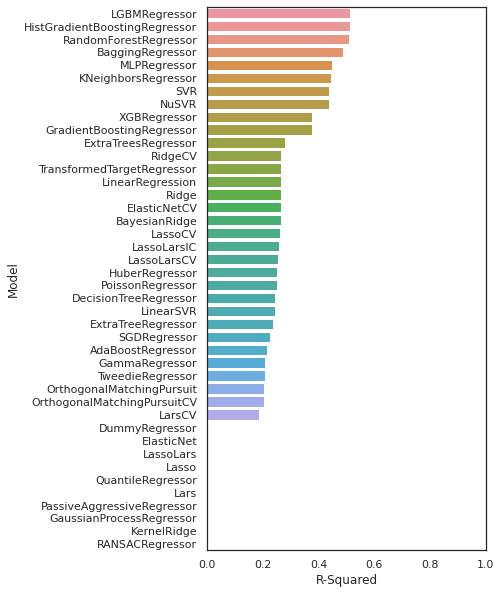

In [ ]:
#Bar plot of r-squared values

plt.figure(figsize=(5,10))
ax= sns.barplot(x='R-Squared', y= train.index, data=train)
ax.set(xlim=(0,1))
plt.show()

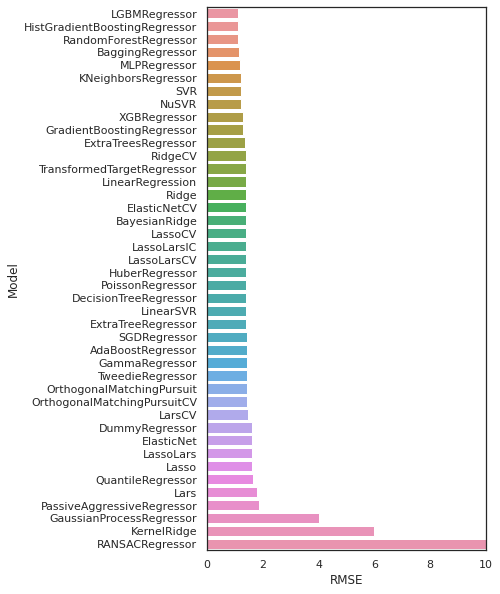

In [ ]:
#Bar plot of RMSE values

plt.figure(figsize=(5,10))
ax= sns.barplot(x='RMSE', y= train.index, data=train)
ax.set(xlim=(0,10))
plt.show()

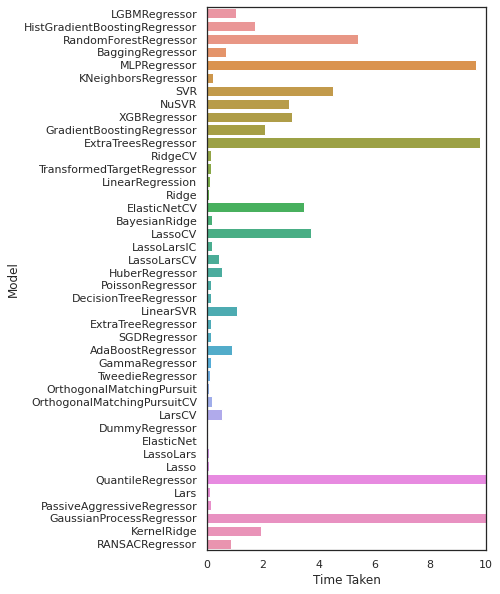

In [ ]:
#Bar plot of calculation time values

plt.figure(figsize=(5,10))
ax= sns.barplot(x='Time Taken', y= train.index, data=train)
ax.set(xlim=(0,10))
plt.show()